**Import** **Libray**

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import Callback
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import shutil
import random
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import zipfile
%matplotlib inline


ModuleNotFoundError: No module named 'keras'

**Ambil Data**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-12 14:47:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.31MB/s    in 82s     

2020-07-12 14:49:04 (3.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Ekstrak Data**

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Menggenerate data image**

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(100, 150),
        shuffle = True,
        batch_size=5,
        subset = 'training',
        class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        batch_size=5,
        subset = 'validation',
        target_size=(100, 150),
        class_mode='categorical')


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


**Membuat model Neural Network**

In [ ]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(100, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

**Mengcompile Model Neural Network**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

**Membuat Callback**

In [ ]:
class DicodingCallback(Callback):

  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.9 and 
       logs.get('val_accuracy') > 0.9 and 
       logs.get('loss') < 0.2):
      print('training selesai')
      self.model.stop_training = True

mycallback = DicodingCallback()

**Melatih model Neural Network**

In [ ]:
latih_model = model.fit(
      train_generator,
      steps_per_epoch=30,  
      epochs=100,
      callbacks = [mycallback],
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2)

Epoch 1/100
 - 6s - loss: 1.0975 - accuracy: 0.4000 - val_loss: 1.1008 - val_accuracy: 0.2800
Epoch 2/100
 - 5s - loss: 1.0946 - accuracy: 0.3533 - val_loss: 1.0340 - val_accuracy: 0.3200
Epoch 3/100
 - 5s - loss: 0.9825 - accuracy: 0.5411 - val_loss: 0.7089 - val_accuracy: 0.5200
Epoch 4/100
 - 5s - loss: 0.8345 - accuracy: 0.6067 - val_loss: 0.9632 - val_accuracy: 0.6000
Epoch 5/100
 - 5s - loss: 0.5804 - accuracy: 0.7800 - val_loss: 0.9335 - val_accuracy: 0.8000
Epoch 6/100
 - 5s - loss: 0.3395 - accuracy: 0.8800 - val_loss: 0.2762 - val_accuracy: 0.8400
Epoch 7/100
 - 5s - loss: 0.3641 - accuracy: 0.8600 - val_loss: 0.0676 - val_accuracy: 0.9200
Epoch 8/100
 - 5s - loss: 0.3095 - accuracy: 0.8933 - val_loss: 0.2306 - val_accuracy: 1.0000
Epoch 9/100
 - 5s - loss: 0.2636 - accuracy: 0.9067 - val_loss: 0.1337 - val_accuracy: 0.8800
Epoch 10/100
 - 5s - loss: 0.3300 - accuracy: 0.8800 - val_loss: 0.4580 - val_accuracy: 0.9600
Epoch 11/100
 - 5s - loss: 0.4173 - accuracy: 0.8600 - val_

**Ploting Train loss**

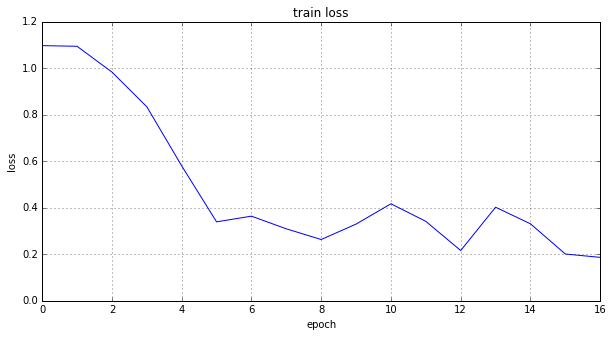

In [ ]:
latih_model_loss = latih_model.history['loss']
x_nomor_epoch = range(len(latih_model_loss))
plt.figure(figsize=(10,5))
plt.title('train loss')
plt.plot(x_nomor_epoch, latih_model_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.style.use(['classic'])

**Test with new image**

Saving O4H6QPX8bdwNiIie.png to O4H6QPX8bdwNiIie.png
O4H6QPX8bdwNiIie.png
[[1. 0. 0.]]
paper


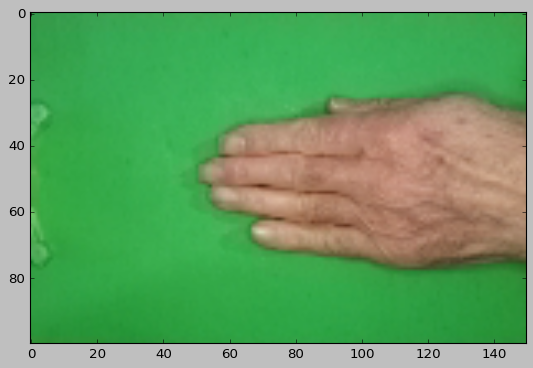

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0] > 0.8:
    print('paper')
  elif classes[0][1] > 0.8 :
    print('rock')
  else:
    print('scissors')